<h2>Importando arquivo com FIIs</h2>

<b>

> [Alianza(alzr11)](https://www.google.com/finance/quote/ALZR11:BVMF?sa=X&ved=2ahUKEwiwjvzen8SBAxXGH7kGHRXgBKoQ3ecFegQIJxAf)

> [BTG Pactual (bcff11)](https://www.google.com/finance/quote/BCFF11:BVMF)

> [Capitania Securities (cpts11)](https://www.google.com/finance/quote/CPTS11:BVMF)

> [CSHG / Credit Suisse Hedging Griffo Corretora de Valores (HGLG)](https://www.google.com/finance/quote/HGLG11:BVMF?window=MAX)

> [Kinea (kncr11)](https://www.google.com/finance/quote/KNCR11:BVMF)

> [VBI Prime Properties (pvbi11)](https://www.google.com/finance/quote/PVBI11:BVMF)
</b>

<h3>Início, executar antes de tudo</h3>


In [ ]:
#Caso esteja executando no Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance as yf
from scipy.sparse import data
import math
yf.pdr_override()

<h3>Importação e tratamento dos dados dos ativos</h3>

In [ ]:
carteira = pd.read_excel("/Financeira p python-1.xlsx")
data_inicial = datetime.now() - timedelta(days=7200)
data_final = datetime.now()
ativos = list(carteira["Ativos"].astype(str) + ".SA")
cotacoes = pdr.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
display(cotacoes)

[*********************100%%**********************]  6 of 6 completed


,ALZR11.SA,BCFF11.SA,CPTS11.SA,HGLG11.SA,KNCR11.SA,PVBI11.SA
Date,,,,,,
2011-03-02,NaN,NaN,NaN,89.395569,NaN,NaN
2011-03-03,NaN,NaN,NaN,89.395569,NaN,NaN
2011-03-04,NaN,NaN,NaN,89.395569,NaN,NaN
2011-03-09,NaN,NaN,NaN,89.395569,NaN,NaN
2011-03-10,NaN,NaN,NaN,89.395569,NaN,NaN
...,...,...,...,...,...,...
2023-09-22,116.290001,74.540001,8.815,161.000000,99.000000,106.000000
2023-09-25,116.000000,73.190002,8.559,161.350006,99.370003,106.000000
2023-09-26,115.900002,72.599998,8.610,161.000000,99.750000,105.620003


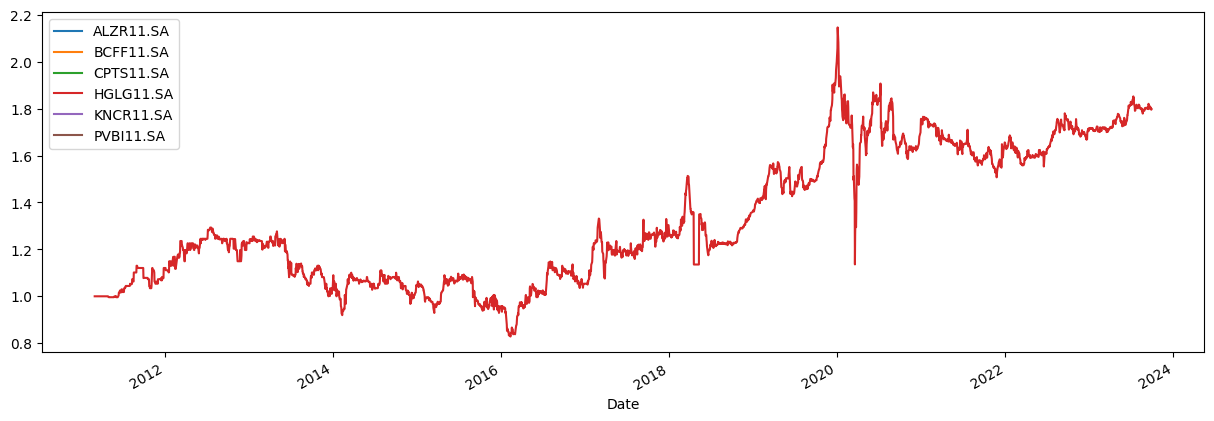

In [ ]:
cotacoes = cotacoes.ffill()
cotacoes_norm = cotacoes / cotacoes.iloc[0]
cotacoes_norm.plot(figsize=(15, 5))
plt.legend(loc="upper left")
plt.savefig('cotacoes_normalizadas.png', dpi=300)
plt.show()

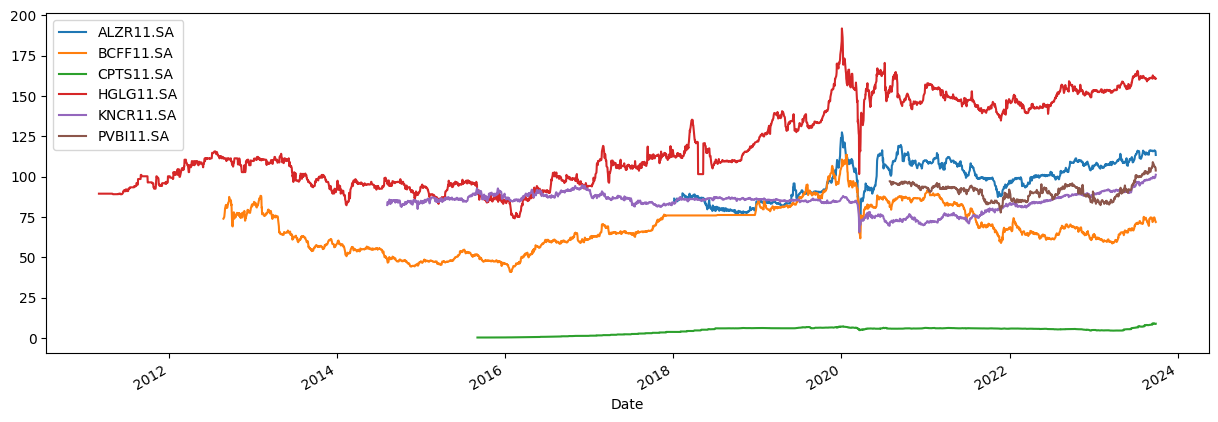

In [ ]:
cotacoes.plot(figsize=(15, 5))
plt.savefig('cotacoes.png', dpi=300)

In [ ]:
ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"]
valor_investido = pd.DataFrame()
for ativo in carteira["Ativos"]:
    qtde_acoes = carteira.loc[carteira["Ativos"]==ativo, "Qtd"].values[0]
    valor_investido[ativo] = qtde_acoes * cotacoes[f"{ativo}.SA"]
valor_investido["Total"] = valor_investido.sum(axis=1)
display(valor_investido)

[*********************100%%**********************]  1 of 1 completed


,KNCR11,CPTS11,PVBI11,HGLG11,BCFF11,ALZR11,Total
Date,,,,,,,
2011-03-02,NaN,NaN,NaN,11979.006226,NaN,NaN,11979.006226
2011-03-03,NaN,NaN,NaN,11979.006226,NaN,NaN,11979.006226
2011-03-04,NaN,NaN,NaN,11979.006226,NaN,NaN,11979.006226
2011-03-09,NaN,NaN,NaN,11979.006226,NaN,NaN,11979.006226
2011-03-10,NaN,NaN,NaN,11979.006226,NaN,NaN,11979.006226
...,...,...,...,...,...,...,...
2023-09-22,37917.000000,1868.779911,16748.000000,21574.000000,9615.660118,11396.42009,99119.860119
2023-09-25,38058.711052,1814.508003,16748.000000,21620.900818,9441.510315,11368.00000,99051.630188
2023-09-26,38204.250000,1825.319927,16687.960434,21574.000000,9365.399803,11358.20015,99015.130314


<h3>Ibov</h3>

> Comparação

> Correlação

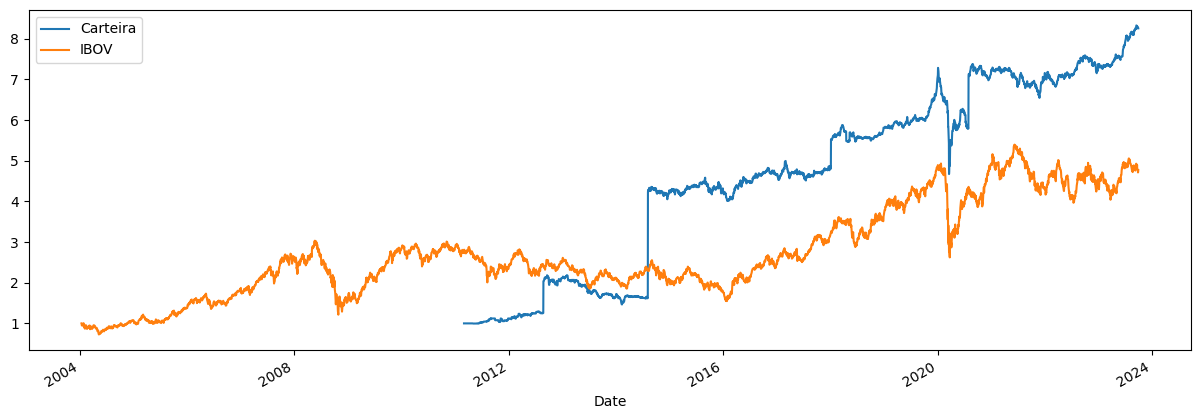

In [ ]:
ibov_norm = ibov / ibov.iloc[0]
valor_investido_norm = valor_investido / valor_investido.iloc[0]
valor_investido_norm["Total"].plot(label="Carteira", figsize=(15, 5))
ibov_norm.plot(label="IBOV")
plt.legend()
plt.savefig('/cotacoes-ibov.png', dpi=300)
plt.show()

In [ ]:
print(valor_investido["Total"].corr(ibov))

0.8243188314722614


<h3>Pandas</h3>

> Gráficos de histórico

> Gráficos de correlação

array([[<Axes: xlabel='ALZR11.SA', ylabel='ALZR11.SA'>,
        <Axes: xlabel='BCFF11.SA', ylabel='ALZR11.SA'>,
        <Axes: xlabel='CPTS11.SA', ylabel='ALZR11.SA'>,
        <Axes: xlabel='HGLG11.SA', ylabel='ALZR11.SA'>,
        <Axes: xlabel='KNCR11.SA', ylabel='ALZR11.SA'>,
        <Axes: xlabel='PVBI11.SA', ylabel='ALZR11.SA'>],
       [<Axes: xlabel='ALZR11.SA', ylabel='BCFF11.SA'>,
        <Axes: xlabel='BCFF11.SA', ylabel='BCFF11.SA'>,
        <Axes: xlabel='CPTS11.SA', ylabel='BCFF11.SA'>,
        <Axes: xlabel='HGLG11.SA', ylabel='BCFF11.SA'>,
        <Axes: xlabel='KNCR11.SA', ylabel='BCFF11.SA'>,
        <Axes: xlabel='PVBI11.SA', ylabel='BCFF11.SA'>],
       [<Axes: xlabel='ALZR11.SA', ylabel='CPTS11.SA'>,
        <Axes: xlabel='BCFF11.SA', ylabel='CPTS11.SA'>,
        <Axes: xlabel='CPTS11.SA', ylabel='CPTS11.SA'>,
        <Axes: xlabel='HGLG11.SA', ylabel='CPTS11.SA'>,
        <Axes: xlabel='KNCR11.SA', ylabel='CPTS11.SA'>,
        <Axes: xlabel='PVBI11.SA', ylabel='CPT

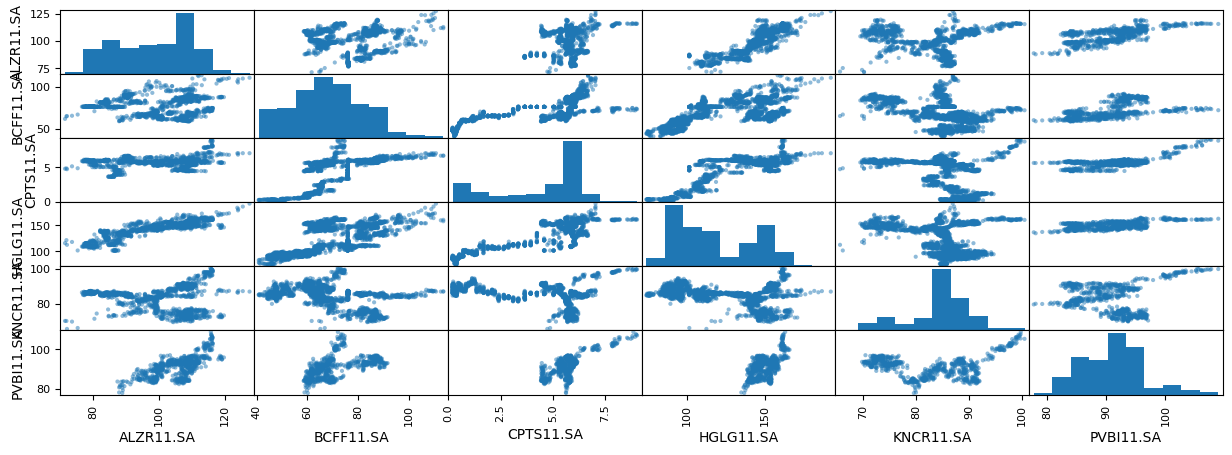

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(cotacoes, figsize=(15, 5))

In [ ]:
cotacoes.corr()

,ALZR11.SA,BCFF11.SA,CPTS11.SA,HGLG11.SA,KNCR11.SA,PVBI11.SA
ALZR11.SA,1.000000,0.032675,0.191100,0.882797,-0.072991,0.690652
BCFF11.SA,0.032675,1.000000,0.739870,0.677597,-0.410666,0.526754
CPTS11.SA,0.191100,0.739870,1.000000,0.836514,-0.322356,0.696591
HGLG11.SA,0.882797,0.677597,0.836514,1.000000,-0.298046,0.571786
KNCR11.SA,-0.072991,-0.410666,-0.322356,-0.298046,1.000000,0.098946
PVBI11.SA,0.690652,0.526754,0.696591,0.571786,0.098946,1.000000


In [ ]:
cotacoes.corr().style.background_gradient(cmap="coolwarm_r", vmin=-1, vmax=1)

,ALZR11.SA,BCFF11.SA,CPTS11.SA,HGLG11.SA,KNCR11.SA,PVBI11.SA
ALZR11.SA,1.000000,0.032675,0.191100,0.882797,-0.072991,0.690652
BCFF11.SA,0.032675,1.000000,0.739870,0.677597,-0.410666,0.526754
CPTS11.SA,0.191100,0.739870,1.000000,0.836514,-0.322356,0.696591
HGLG11.SA,0.882797,0.677597,0.836514,1.000000,-0.298046,0.571786
KNCR11.SA,-0.072991,-0.410666,-0.322356,-0.298046,1.000000,0.098946
PVBI11.SA,0.690652,0.526754,0.696591,0.571786,0.098946,1.000000


<h3>Histórico de dividendos</h3>

> Gráfico do histórico completo

> Somas dos dividendos do último 1 ano

<b>Não execute a última célula caso faça alterações no xlsx</b>

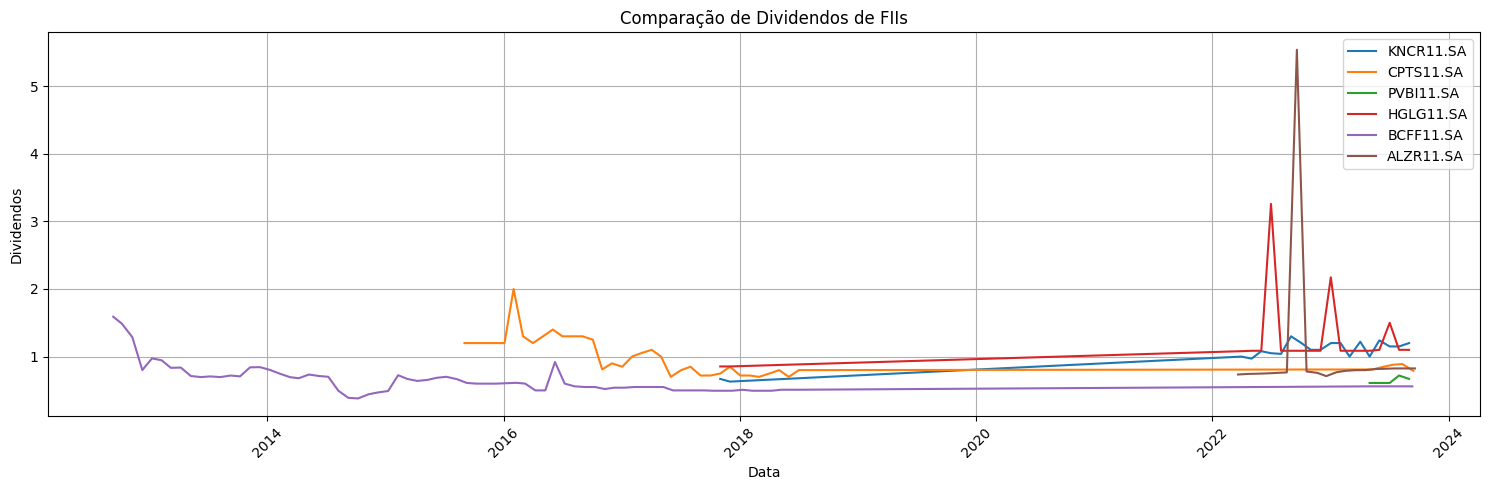

In [ ]:
historicos_dividendos = []
for ativo in ativos:
    ticker = yf.Ticker(ativo)
    historico_dividendos = ticker.dividends
    historicos_dividendos.append(historico_dividendos)
plt.figure(figsize=(15, 5))
for i, ativo in enumerate(ativos):
    plt.plot(historicos_dividendos[i].index, historicos_dividendos[i], label=ativo)
plt.xlabel("Data")
plt.ylabel("Dividendos")
plt.title("Comparação de Dividendos de FIIs")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/dividendos.png', dpi=300)
plt.show()

In [ ]:
display(historicos_dividendos)

[Date
 2017-11-01 00:00:00-02:00    0.67
 2017-12-01 00:00:00-02:00    0.63
 2022-04-01 00:00:00-03:00    1.00
 2022-05-02 00:00:00-03:00    0.97
 2022-06-01 00:00:00-03:00    1.08
 2022-07-01 00:00:00-03:00    1.05
 2022-08-01 00:00:00-03:00    1.04
 2022-09-01 00:00:00-03:00    1.30
 2022-10-03 00:00:00-03:00    1.20
 2022-11-01 00:00:00-03:00    1.10
 2022-12-01 00:00:00-03:00    1.10
 2023-01-02 00:00:00-03:00    1.20
 2023-02-01 00:00:00-03:00    1.20
 2023-03-01 00:00:00-03:00    1.00
 2023-04-03 00:00:00-03:00    1.22
 2023-05-02 00:00:00-03:00    1.00
 2023-06-01 00:00:00-03:00    1.24
 2023-07-03 00:00:00-03:00    1.15
 2023-08-01 00:00:00-03:00    1.15
 2023-09-01 00:00:00-03:00    1.20
 Name: Dividends, dtype: float64,
 Date
 2015-09-02 00:00:00-03:00    1.20
 2015-10-01 00:00:00-03:00    1.20
 2015-11-03 00:00:00-02:00    1.20
 2015-12-01 00:00:00-02:00    1.20
 2016-01-04 00:00:00-02:00    1.20
 2016-02-01 00:00:00-02:00    2.00
 2016-03-01 00:00:00-03:00    1.30
 2016-04-

In [ ]:
#Alianza
dividendos_alianza = historicos_dividendos[0]
dividend_anual_alianza = sum(dividendos_alianza[-12:])
print(dividend_anual_alianza)
#BTG Pactual, bcff
dividendos_btg = historicos_dividendos[1]
dividend_anual_btg = sum(dividendos_btg[-12:])
print(dividend_anual_btg)
#cpts
dividendos_cpts = historicos_dividendos[2]
dividend_anual_cpts = sum(dividendos_cpts[-12:])
print(dividend_anual_cpts)
#HGLG
dividendos_hglg = historicos_dividendos[3]
dividend_anual_hglg = sum(dividendos_hglg[-12:])
print(dividend_anual_hglg)
#Kinea
dividendos_kinea = historicos_dividendos[4]
dividend_anual_kinea = sum(dividendos_kinea[-12:])
print(dividend_anual_kinea)
#pvbi
dividendos_pvbi = historicos_dividendos[5]
dividend_anual_pvbi = sum(dividendos_pvbi[-12:])
print(dividend_anual_pvbi)

13.76
9.41
3.2199999999999998
14.575709999999999
6.3238530000000015
14.236459


<h3>Dividend yeld</h3>

> Dividendos mensais maiores que 1% do valor da cota

> Separação de dados para o próximo passo

<b>Não execute caso faça alterações no xlsx</b>

In [ ]:
alianza = cotacoes['ALZR11.SA'].dropna()
bcff = cotacoes['BCFF11.SA'].dropna()
cpts = cotacoes['CPTS11.SA'].dropna()
hglg = cotacoes['HGLG11.SA'].dropna()
kncr = cotacoes['KNCR11.SA'].dropna()
pvbi = cotacoes['PVBI11.SA'].dropna()
display(alianza)
display(bcff)
display(cpts)
display(hglg)
display(kncr)
display(pvbi)

Date
2018-01-04     86.287262
2018-01-05     84.499954
2018-01-08     85.645889
2018-01-09     85.218323
2018-01-10     84.747971
                 ...    
2023-09-21    115.940002
2023-09-22    116.290001
2023-09-25    116.000000
2023-09-26    115.900002
2023-09-27    115.500000
Name: ALZR11.SA, Length: 1423, dtype: float64

Date
2012-08-24    73.899605
2012-08-27    74.695427
2012-08-28    75.320724
2012-08-29    76.685013
2012-08-30    78.128922
                ...    
2023-09-21    74.720001
2023-09-22    74.540001
2023-09-25    73.190002
2023-09-26    72.599998
2023-09-27    71.949997
Name: BCFF11.SA, Length: 2754, dtype: float64

Date
2015-09-02    0.199007
2015-09-03    0.200761
2015-09-04    0.200761
2015-09-08    0.200761
2015-09-09    0.200761
                ...   
2023-09-21    8.817000
2023-09-22    8.815000
2023-09-25    8.559000
2023-09-26    8.610000
2023-09-27    8.740000
Name: CPTS11.SA, Length: 2008, dtype: float64

Date
2011-03-02     89.395576
2011-03-03     89.395576
2011-03-04     89.395576
2011-03-09     89.395576
2011-03-10     89.395576
                 ...    
2023-09-21    161.779999
2023-09-22    161.000000
2023-09-25    161.350006
2023-09-26    161.000000
2023-09-27    160.500000
Name: HGLG11.SA, Length: 3123, dtype: float64

Date
2014-08-06     82.335228
2014-08-07     84.196411
2014-08-08     84.196411
2014-08-11     83.294022
2014-08-12     83.785507
                 ...    
2023-09-21     99.449997
2023-09-22     99.000000
2023-09-25     99.370003
2023-09-26     99.750000
2023-09-27    100.500000
Name: KNCR11.SA, Length: 2276, dtype: float64

Date
2020-07-29     97.078400
2020-07-30     96.797684
2020-07-31     96.700897
2020-08-03     96.797684
2020-08-04     95.829720
                 ...    
2023-09-21    106.889999
2023-09-22    106.000000
2023-09-25    106.000000
2023-09-26    105.620003
2023-09-27    105.449997
Name: PVBI11.SA, Length: 788, dtype: float64

In [ ]:
alianza_hoje = alianza[-1]
btg_hoje = bcff[-1]
cpts_hoje = cpts[-1]
hglg_hoje = hglg[-1]
kinea_hoje = kncr[-1]
pvbi_hoje = pvbi[-1]
print(f"O preço de cada cota de fundo imobiliario da Alianza (alzr11) hoje é de R$ {alianza_hoje:.2f}")
print(f"O preço de cada cota de fundo imobiliario da BTG Pactual (bcff11) hoje é de R$ {btg_hoje:.2f}")
print(f"O preço de cada cota de CPTS (cpts11) hoje é de R$ {cpts_hoje:.2f}")
print(f"O preço de cada cota de HGLG (hglg11) hoje é de R$ {hglg_hoje:.2f}")
print(f"O preço de cada cota de fundo imobiliario da Kinea (kncr11) hoje é de R$ {kinea_hoje:.2f}")
print(f"O preço de cada cota de PVBI (pvbi11) hoje é de R$ {pvbi_hoje:.2f}")

O preço de cada cota de fundo imobiliario da Alianza (alzr11) hoje é de R$ 115.50
O preço de cada cota de fundo imobiliario da BTG Pactual (bcff11) hoje é de R$ 71.95
O preço de cada cota de CPTS (cpts11) hoje é de R$ 8.74
O preço de cada cota de HGLG (hglg11) hoje é de R$ 160.50
O preço de cada cota de fundo imobiliario da Kinea (kncr11) hoje é de R$ 100.50
O preço de cada cota de PVBI (pvbi11) hoje é de R$ 105.45


In [ ]:
#Alianza
dividend_yeld_alianza = ( ( dividend_anual_alianza / alianza_hoje ) * 100 )
print(f"O dividend-yeld atual de Alianza é {dividend_yeld_alianza:.2f}%")
dividendo_mensal_alzr = (dividend_yeld_alianza / 12)
print(f"Resultando num dividendo mensal igual a {dividendo_mensal_alzr:.2f}% do preço da cota")
print("-------------------------------------------------------------------------------------------------")
#BTG Pactual
dividend_yeld_bcff = ( ( dividend_anual_btg / btg_hoje ) * 100 )
print(f"O dividend-yeld atual de BCFF é {dividend_yeld_bcff:.2f}%")
dividendo_mensal_bcff = (dividend_yeld_bcff / 12)
print(f"Resultando num dividendo mensal igual a {dividendo_mensal_bcff:.2f}% do preço da cota")
print("-------------------------------------------------------------------------------------------------")
#CPTS
dividend_yeld_cpts = ( ( dividend_anual_cpts / cpts_hoje ) * 100 )
print(f"O dividend-yeld atual de CPTS é {dividend_yeld_cpts:.2f}%")
dividendo_mensal_cpts = (dividend_yeld_cpts / 12)
print(f"Resultando num dividendo mensal igual a {dividendo_mensal_cpts:.2f}% do preço da cota")
print("-------------------------------------------------------------------------------------------------")
#HGLG
dividend_yeld_hglg = ( ( dividend_anual_hglg / hglg_hoje ) * 100 )
print(f"O dividend-yeld atual de HGLG é {dividend_yeld_hglg:.2f}%")
dividendo_mensal_hglg = (dividend_yeld_hglg / 12)
print(f"Resultando num dividendo mensal igual a {dividendo_mensal_hglg:.2f}% do preço da cota")
print("-------------------------------------------------------------------------------------------------")
#Kinea
dividend_yeld_kncr = ( ( dividend_anual_kinea / kinea_hoje ) * 100 )
print(f"O dividend-yeld atual de Kinea é {dividend_yeld_kncr:.2f}%")
dividendo_mensal_kncr = (dividend_yeld_kncr / 12)
print(f"Resultando num dividendo mensal igual a {dividendo_mensal_kncr:.2f}% do preço da cota")
print("-------------------------------------------------------------------------------------------------")
#HGLG
dividend_yeld_pvbi = ( ( dividend_anual_pvbi / pvbi_hoje ) * 100 )
print(f"O dividend-yeld atual de PVBI é {dividend_yeld_pvbi:.2f}%")
dividendo_mensal_pvbi = (dividend_yeld_pvbi / 12)
print(f"Resultando num dividendo mensal igual a {dividendo_mensal_pvbi:.2f}% do preço da cota")

O dividend-yeld atual de Alianza é 11.91%
Resultando num dividendo mensal igual a 0.99% do preço da cota
-------------------------------------------------------------------------------------------------
O dividend-yeld atual de BCFF é 13.08%
Resultando num dividendo mensal igual a 1.09% do preço da cota
-------------------------------------------------------------------------------------------------
O dividend-yeld atual de CPTS é 36.84%
Resultando num dividendo mensal igual a 3.07% do preço da cota
-------------------------------------------------------------------------------------------------
O dividend-yeld atual de HGLG é 9.08%
Resultando num dividendo mensal igual a 0.76% do preço da cota
-------------------------------------------------------------------------------------------------
O dividend-yeld atual de Kinea é 6.29%
Resultando num dividendo mensal igual a 0.52% do preço da cota
------------------------------------------------------------------------------------------------

In [ ]:
rendimentos_mensais = {
    'Alianza': dividendo_mensal_alzr,
    'BTG Pactual': dividendo_mensal_bcff,
    'cpts': dividendo_mensal_cpts,
    'hglg': dividendo_mensal_hglg,
    'Kinea': dividendo_mensal_kncr,
    'pvbi': dividendo_mensal_pvbi,
}
for variavel, rendimento in rendimentos_mensais.items():
    if rendimento > 1:
        print(f"O fundo {variavel} tem um rendimento mensal de {rendimento:.2f}% do valor da cota")

O fundo BTG Pactual tem um rendimento mensal de 1.09% do valor da cota
O fundo cpts tem um rendimento mensal de 3.07% do valor da cota
O fundo pvbi tem um rendimento mensal de 1.13% do valor da cota


<h3>Comparando com outros índices</h3>

> Comparação com valor patrimonial

> Cotas para o magic-number

> Custo para o magic-number

<b>Não execute caso faça alterações no xlsx</b>

<p>Agora irei inserir e trabalhar com informações que não são possíveis se importar com o python ou alguma biblioteca como yfinance</p>

In [ ]:
#ALZR11

valor_patrimonial_alzr = 732928810.00
qtd_cotas_alzr = 6922906
preco_justo_alzr = valor_patrimonial_alzr / qtd_cotas_alzr
diferenca_percentual_alzr = ((alianza_hoje - preco_justo_alzr) / preco_justo_alzr) * 100
diferenca_percentual_absoluto_alzr = abs(diferenca_percentual_alzr)
print(f"O valor patrimonial de cada cota de alzr11 é R$ {preco_justo_alzr:.2f} e")
if preco_justo_alzr > alianza_hoje:
    print(f"Atualmente cada cota de alrz11 está com um deságio de {round(diferenca_percentual_absoluto_alzr, 2)}%")
elif alianza_hoje > preco_justo_alzr:
    print(f"Atualmente cada cota de alrz11 está com um ágio de {round(diferenca_percentual_absoluto_alzr, 2)}%")
else:
    print("Alzr11 está sendo negociado ao seu valor patrimonial")

print("-------------------------------------------------------------------------------------------------")

#BCFF11

valor_patrimonial_bcff = 1811005978.00
qtd_cotas_bcff = 25186378
preco_justo_bcff = valor_patrimonial_bcff / qtd_cotas_bcff
diferenca_percentual_bcff = ((btg_hoje - preco_justo_bcff) / preco_justo_bcff) * 100
diferenca_percentual_absoluto_cpts = abs(diferenca_percentual_bcff)
print(f"O valor patrimonial de cada cota de bcff11 é R$ {preco_justo_bcff:.2f} e")
if preco_justo_bcff > btg_hoje:
    print(f"Atualmente cada cota de bcff11 está com um deságio de {round(diferenca_percentual_absoluto_cpts, 2)}%")
elif btg_hoje > preco_justo_bcff:
    print(f"Atualmente cada cota de bcff11 está com um ágio de {round(diferenca_percentual_absoluto_cpts, 2)}%")
else:
    print("bcff11 está sendo negociado ao seu valor patrimonial")

print("-------------------------------------------------------------------------------------------------")

#CPTS11

valor_patrimonial_cpts = 2809831616.00
qtd_cotas_cpts = 317828140
preco_justo_cpts = valor_patrimonial_cpts / qtd_cotas_cpts
diferenca_percentual_cpts = ((cpts_hoje - preco_justo_cpts) / preco_justo_cpts) * 100
diferenca_percentual_absoluto_cpts = abs(diferenca_percentual_cpts)
print(f"O valor patrimonial de cada cota de cpts11 é R$ {preco_justo_cpts:.2f} e")
if preco_justo_cpts > cpts_hoje:
    print(f"Atualmente cada cota de cpts11 está com um deságio de {round(diferenca_percentual_absoluto_cpts, 2)}%")
elif cpts_hoje > preco_justo_cpts:
    print(f"Atualmente cada cota de cpts11 está com um ágio de {round(diferenca_percentual_absoluto_cpts, 2)}%")
else:
    print("cpts11 está sendo negociado ao seu valor patrimonial")

print("-------------------------------------------------------------------------------------------------")

#HGLG11

valor_patrimonial_hglg = 3577143617.00
qtd_cotas_hglg = 23456675
preco_justo_hglg = valor_patrimonial_hglg / qtd_cotas_hglg
diferenca_percentual_hglg = ((hglg_hoje - preco_justo_hglg) / preco_justo_hglg) * 100
diferenca_percentual_absoluto_hglg = abs(diferenca_percentual_hglg)
print(f"O valor patrimonial de cada cota de hglg11 é R$ {preco_justo_hglg:.2f} e")
if preco_justo_hglg > hglg_hoje:
    print(f"Atualmente cada cota de hglg11 está com um deságio de {round(diferenca_percentual_absoluto_hglg, 2)}%")
elif hglg_hoje > preco_justo_hglg:
    print(f"Atualmente cada cota de hglg11 está com um ágio de {round(diferenca_percentual_absoluto_hglg, 2)}%")
else:
    print("hglg11 está sendo negociado ao seu valor patrimonial")

print("-------------------------------------------------------------------------------------------------")

#KNCR11

valor_patrimonial_kncr = 5756022790.00
qtd_cotas_kncr = 57097087
preco_justo_kncr = valor_patrimonial_kncr / qtd_cotas_kncr
diferenca_percentual_kncr = ((kinea_hoje - preco_justo_kncr) / preco_justo_kncr) * 100
diferenca_percentual_absoluto_kncr = abs(diferenca_percentual_kncr)
print(f"O valor patrimonial de cada cota de kncr11 é R$ {preco_justo_kncr:.2f} e")
if preco_justo_kncr > kinea_hoje:
    print(f"Atualmente cada cota de kncr11 está com um deságio de {round(diferenca_percentual_absoluto_kncr, 2)}%")
elif kinea_hoje > preco_justo_kncr:
    print(f"Atualmente cada cota de kncr11 está com um ágio de {round(diferenca_percentual_absoluto_kncr, 2)}%")
else:
    print("kncr11 está sendo negociado ao seu valor patrimonial")

print("-------------------------------------------------------------------------------------------------")

#PVBI11

valor_patrimonial_pvbi = 1240685182.00
qtd_cotas_pvbi = 12142208
preco_justo_pvbi = valor_patrimonial_pvbi / qtd_cotas_pvbi
diferenca_percentual_pvbi = ((pvbi_hoje - preco_justo_pvbi) / preco_justo_pvbi) * 100
diferenca_percentual_absoluto_pvbi = abs(diferenca_percentual_pvbi)
print(f"O valor patrimonial de cada cota de pvbi11 é R$ {preco_justo_pvbi:.2f} e")
if preco_justo_pvbi > pvbi_hoje:
    print(f"Atualmente cada cota de pvbi11 está com um deságio de {round(diferenca_percentual_absoluto_pvbi, 2)}%")
elif pvbi_hoje > preco_justo_pvbi:
    print(f"Atualmente cada cota de pvbi11 está com um ágio de {round(diferenca_percentual_absoluto_pvbi, 2)}%")
else:
    print("pvbi11 está sendo negociado ao seu valor patrimonial")

O valor patrimonial de cada cota de alzr11 é R$ 105.87 e
Atualmente cada cota de alrz11 está com um ágio de 9.1%
-------------------------------------------------------------------------------------------------
O valor patrimonial de cada cota de bcff11 é R$ 71.90 e
Atualmente cada cota de bcff11 está com um ágio de 0.06%
-------------------------------------------------------------------------------------------------
O valor patrimonial de cada cota de cpts11 é R$ 8.84 e
Atualmente cada cota de cpts11 está com um deságio de 1.14%
-------------------------------------------------------------------------------------------------
O valor patrimonial de cada cota de hglg11 é R$ 152.50 e
Atualmente cada cota de hglg11 está com um ágio de 5.25%
-------------------------------------------------------------------------------------------------
O valor patrimonial de cada cota de kncr11 é R$ 100.81 e
Atualmente cada cota de kncr11 está com um deságio de 0.31%
------------------------------------

In [ ]:
agios = {
    "alzr": diferenca_percentual_alzr,
    "bcff": diferenca_percentual_bcff,
    "cpts": diferenca_percentual_cpts,
    "hglg": diferenca_percentual_hglg,
    "kncr": diferenca_percentual_kncr,
    "pvbi": diferenca_percentual_pvbi,
}
melhores_agios = [float('inf')] * 3
nomes = [""] * 3
for fii, agio in agios.items():
    if agio < melhores_agios[0]:
        melhores_agios[2] = melhores_agios[1]
        nomes[2] = nomes[1]
        melhores_agios[1] = melhores_agios[0]
        nomes[1] = nomes[0]
        melhores_agios[0] = agio
        nomes[0] = fii
    elif agio < melhores_agios[1]:
        melhores_agios[2] = melhores_agios[1]
        nomes[2] = nomes[1]
        melhores_agios[1] = agio
        nomes[1] = fii
    elif agio < melhores_agios[2]:
        melhores_agios[2] = agio
        nomes[2] = fii
print(nomes[0], melhores_agios[0])
print(nomes[1], melhores_agios[1])
print(nomes[2], melhores_agios[2])

cpts -1.1393474599257964
kncr -0.30864274079777154
bcff 0.06371277904606805


In [ ]:
rendimentos_anuais = {
    'Alianza': dividend_yeld_alianza,
    'BTG Pactual': dividend_yeld_bcff,
    'cpts': dividend_yeld_cpts,
    'hglg': dividend_yeld_hglg,
    'Kinea': dividend_yeld_kncr,
    'pvbi': dividend_yeld_pvbi,
}
variaveis = [""] * 3
rendimentos = [float('0')] * 3
for variavel, rendimento in rendimentos_anuais.items():
  if rendimento > rendimentos[0]:
    variaveis[0] = variavel
    rendimentos[0] = rendimento
  elif rendimento > rendimentos[1]:
    variaveis[1] = variavel
    rendimentos[1] = rendimento
  elif rendimento > rendimentos[2]:
    variaveis[2] = variavel
    rendimentos[2] = rendimento
print(variaveis[0], rendimentos[0])
print(variaveis[1], rendimentos[1])
print(variaveis[2], rendimentos[2])

cpts 36.84210622797356
pvbi 13.50067274728102
Kinea 6.29239104477612


In [ ]:
dividend_medio_alzr = ( dividend_anual_alianza / 12 )
dividend_medio_bcff = ( dividend_anual_btg / 12 )
dividend_medio_cpts = ( dividend_anual_cpts / 12 )
dividend_medio_hglg = ( dividend_anual_hglg / 12 )
dividend_medio_kncr = ( dividend_anual_kinea / 12 )
dividend_medio_pvbi = ( dividend_anual_pvbi / 12 )
magic_number_alzr = math.ceil(alianza_hoje / dividend_medio_alzr)
magic_number_bcff = math.ceil(btg_hoje / dividend_medio_bcff)
magic_number_cpts = math.ceil(cpts_hoje / dividend_medio_cpts)
magic_number_hglg = math.ceil(hglg_hoje / dividend_medio_hglg)
magic_number_kncr = math.ceil(kinea_hoje / dividend_medio_kncr)
magic_number_pvbi = math.ceil(pvbi_hoje / dividend_medio_pvbi)
custo_magic_alzr = magic_number_alzr * alianza_hoje
custo_magic_bcff = magic_number_bcff * btg_hoje
custo_magic_cpts = magic_number_cpts * cpts_hoje
custo_magic_hglg = magic_number_hglg * hglg_hoje
custo_magic_kncr = magic_number_kncr * kinea_hoje
custo_magic_pvbi = magic_number_pvbi * pvbi_hoje
numeros_magicos = [
    magic_number_alzr,
    magic_number_bcff,
    magic_number_cpts,
    magic_number_hglg,
    magic_number_kncr,
    magic_number_pvbi,
]
custos_magic = {
    "alzr": custo_magic_alzr,
    "bcff": custo_magic_bcff,
    "cpts": custo_magic_cpts,
    "hglg": custo_magic_hglg,
    "kncr": custo_magic_kncr,
    "pvbi": custo_magic_pvbi,
}
display(numeros_magicos)
display(custos_magic)

[101, 92, 33, 133, 191, 89]

{'alzr': 11665.5,
 'bcff': 6619.399719238281,
 'cpts': 288.4199924468994,
 'hglg': 21346.5,
 'kncr': 19195.5,
 'pvbi': 9385.049728393555}

In [ ]:
best_cost = [math.inf] * 3
names = [""] * 3
for name, cost in custos_magic.items():
    if cost < best_cost[0]:
        best_cost[2] = best_cost[1]
        names[2] = names[1]
        best_cost[1] = best_cost[0]
        names[1] = names[0]
        best_cost[0] = cost
        names[0] = name
    elif cost < best_cost[1]:
        best_cost[2] = best_cost[1]
        names[2] = names[1]
        best_cost[1] = cost
        names[1] = name
    elif cost < best_cost[2]:
        best_cost[2] = cost
        names[2] = name
best_cost = [cost if cost != math.inf else None for cost in best_cost]
print(names[0], best_cost[0])
print(names[1], best_cost[1])
print(names[2], best_cost[2])

cpts 288.4199924468994
bcff 6619.399719238281
pvbi 9385.049728393555


<h3>Conclusão da avaliação dos FIIs em Financeira p python</h3>

<b>Não execute caso faça alterações no xlsx</b>

In [2]:
print("Levando em consideração os valores patrimoniais, os fundos que mais compensão são:")
print(f"{nomes[0]}11 com um ágio de: {melhores_agios[0]:.2f}%")
print(f"{nomes[1]}11 com um ágio de: {melhores_agios[1]:.2f}%")
print(f"{nomes[2]}11 com um ágio de: {melhores_agios[2]:.2f}%")

Levando em consideração os valores patrimoniais, os fundos que mais compensão são:
cpts11 com um ágio de: -1.14%
kncr11 com um ágio de: -0.31%
bcff11 com um ágio de: 0.06%


In [ ]:
print("Levando em consideração os dividend-yeld, os fundos que mais compensão são:")
print(f"{variaveis[0]}11 com um dividend-yeld de: {rendimentos[0]:.2f}%")
print(f"{variaveis[1]}11 com um dividend-yeld de: {rendimentos[1]:.2f}%")
print(f"{variaveis[2]}11 com um dividend-yeld de: {rendimentos[2]:.2f}%")

Levando em consideração os dividend-yeld, os fundos que mais compensão são:
cpts11 com um dividend-yeld de: 36.84%
pvbi11 com um dividend-yeld de: 13.50%
Kinea11 com um dividend-yeld de: 6.29%


In [ ]:
print("E Levando em consideração os fundos com magic-number mais barato, os fundos que mais compensão são:")
print(f"{names[0]}11, custando R$ {best_cost[0]:.2f} para se atingir o magic-number")
print(f"{names[1]}11, custando R$ {best_cost[1]:.2f} para se atingir o magic-number")
print(f"{names[2]}11, custando R$ {best_cost[2]:.2f} para se atingir o magic-number")

E Levando em consideração os fundos com magic-number mais barato, os fundos que mais compensão são:
cpts11, custando R$ 288.42 para se atingir o magic-number
bcff11, custando R$ 6619.40 para se atingir o magic-number
pvbi11, custando R$ 9385.05 para se atingir o magic-number
